![BTS](img/Logo-BTS.jpg)

# Session 13: Exploratory Data Analysis

### Juan Luis Cano Rodríguez <juan.cano@bts.tech> - Data Science Foundations (2018-11-16)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Juanlu001/bts-mbds-data-science-foundations/blob/master/sessions/13-Exploratory-Data-Analysis.ipynb)

## Exercise 1: EDA on grocery sales dataset (I)

We will perform an exploratory data analysis of the "Corporación Favorita Grocery Sales Forecasting" Kaggle competition dataset:

https://www.kaggle.com/c/favorita-grocery-sales-forecasting/data

You already have a sample to play with.

1. Load all the datasets, with attention to: dates, _unique_ indexes, numerical variables that are in fact categorical variables
2. Count the categorical variables: how many unique stores, items, product families... are there?
3. Try to find out what families of products have integer `unit_sales` and which ones have a floating point value, and plot the overall distribution of both
4. Are there any days without transactions/sales? Is this data consistent with the vacations?
5. Visualize the transactions volume by year and month in one single plot. Do you observe anything special?
6. Visualize the transactions volume by day of week. Is there a weekday/weekend pattern in the data?
7. Visualize the transactions by day of the month. Do you observe any strange peaks? Try to figure out what's going on.
8. "A magnitude 7.8 earthquake struck Ecuador on April 16, 2016". Visualize the transactions volume by day of April every year. Is the earthquake visible?

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [98]:
data = pd.read_csv(
    "data/favorita/train_sample.csv",
    dtype={
        'store_nbr': str,  # or "category"
        'item_nbr': str,  # or "category"
    },
    index_col="id",
    parse_dates=['date'],
)
data['onpromotion'] = data['onpromotion'].replace({0.0: False, 1.0: True})
data.head()

/home/juanlu/.miniconda36/envs/bts36/lib/python3.6/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,date,store_nbr,item_nbr,unit_sales,onpromotion
id,,,,,
4954,2013-01-02,5,105737,6.0,NaN
4958,2013-01-02,5,108698,1.0,NaN
4961,2013-01-02,5,108797,13.0,NaN
4963,2013-01-02,5,111223,14.0,NaN
4964,2013-01-02,5,112830,1.0,NaN


In [4]:
s = data['onpromotion']

In [74]:
trans = pd.read_csv(
    "data/favorita/transactions.csv",
    dtype={
        'store_nbr': str,
    },
    parse_dates=['date'],
)
trans.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [77]:
trans['year'] = trans['date'].dt.year
trans['month'] = trans['date'].dt.month
trans['day'] = trans['date'].dt.day
trans['weekday'] = trans['date'].dt.weekday

In [78]:
trans.head()

,date,store_nbr,transactions,month,day,weekday,year
0,2013-01-01,25,770,1,1,1,2013
1,2013-01-02,1,2111,1,2,2,2013
2,2013-01-02,2,2358,1,2,2,2013
3,2013-01-02,3,3487,1,2,2,2013
4,2013-01-02,4,1922,1,2,2,2013


In [82]:
trans.loc[(trans['year'] == 2013) & (trans['month'] == 1), 'transactions'].sum()

2289558

In [ ]:
table_year_month.plot.

In [93]:
trans.loc[trans['date'] >= '2017-08-01', 'transactions'] = None

In [95]:
table_year_month = trans.pivot_table(index='year', columns='month', values='transactions', aggfunc='sum')
table_year_month

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2013,2289558.0,2169615.0,2458683.0,2344905.0,2467465.0,2392206.0,2401968.0,2461139.0,2380462.0,2408440.0,2369866.0,2962866.0
2014,2393528.0,2278167.0,2545427.0,2455666.0,2503262.0,2399144.0,2442341.0,2537572.0,2449131.0,2503310.0,2450298.0,3049083.0
2015,2489059.0,2345984.0,2625500.0,2533355.0,2673911.0,2530903.0,2604784.0,2675057.0,2545252.0,2610484.0,2528193.0,3149888.0
2016,2371205.0,2465798.0,2607658.0,2631797.0,2666157.0,2491063.0,2594087.0,2536111.0,2436974.0,2526000.0,2529516.0,3195971.0
2017,2612848.0,2448370.0,2680645.0,2667808.0,2801884.0,2668863.0,2784026.0,0.0,NaN,NaN,NaN,NaN


In [96]:
trans.tail()

,date,store_nbr,transactions,month,day,weekday,year
83483,2017-08-15,50,NaN,8,15,1,2017
83484,2017-08-15,51,NaN,8,15,1,2017
83485,2017-08-15,52,NaN,8,15,1,2017
83486,2017-08-15,53,NaN,8,15,1,2017
83487,2017-08-15,54,NaN,8,15,1,2017


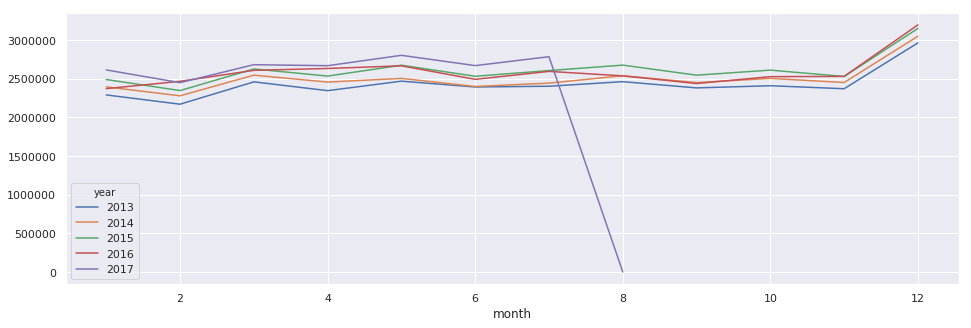

In [97]:
table_year_month.T.plot(figsize=(16, 5))

In [40]:
#(trans['date'].dt.dayofyear % 60).plot()

In [46]:
#trans['date'].dt.weekday_name
#trans['date'].dt.weekday

In [30]:
trans['month'] = trans['date'].dt.month

In [49]:
trans[(trans['date'].dt.month == 12) & (trans['date'].dt.day == 25)]

,date,store_nbr,transactions,month


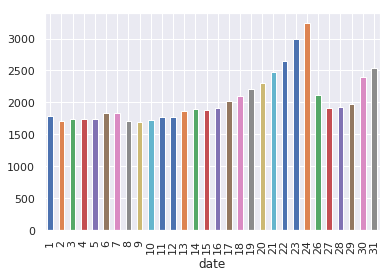

In [59]:
mean_dec_by_day.plot.bar();

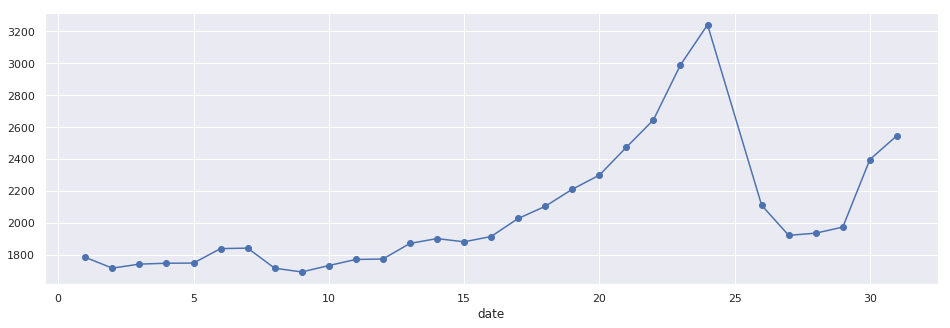

In [57]:
mean_dec_by_day = trans[trans['date'].dt.month == 12].groupby(trans['date'].dt.day)['transactions'].mean()
mean_dec_by_day.plot(figsize=(16, 5), marker='o');

In [69]:
daily_mean = trans.groupby('date')['transactions'].mean().asfreq("D")#["2013-12-23":"2013-12-26"]

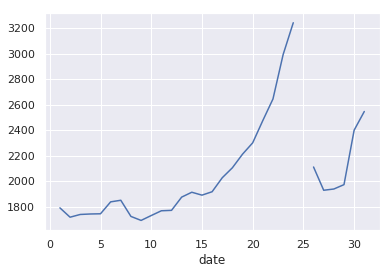

In [73]:
dec_daily_mean = daily_mean[daily_mean.index.month == 12]
dec_daily_mean.groupby(dec_daily_mean.index.day).mean().plot();

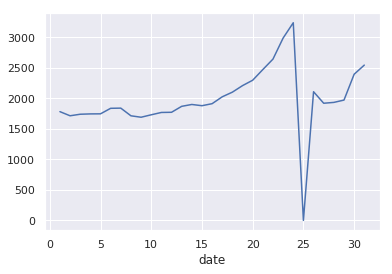

In [56]:
mean_dec_by_day.reindex(range(1, 32)).fillna(0.0).plot()

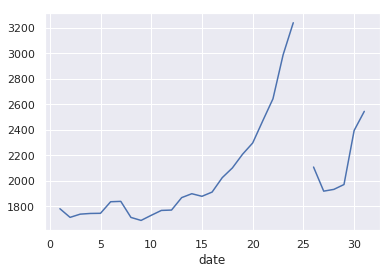

In [55]:
mean_dec_by_day.reindex(range(1, 32)).plot()

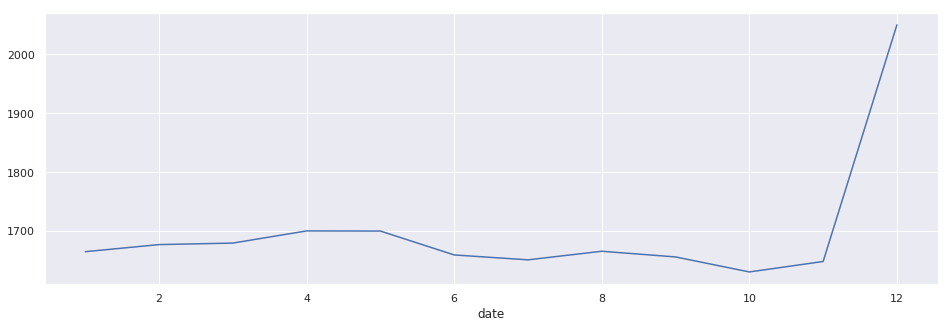

In [35]:
trans.groupby(trans['date'].dt.month)['transactions'].mean().plot(figsize=(16, 5));
#trans.groupby('month').mean().plot(figsize=(16, 5));

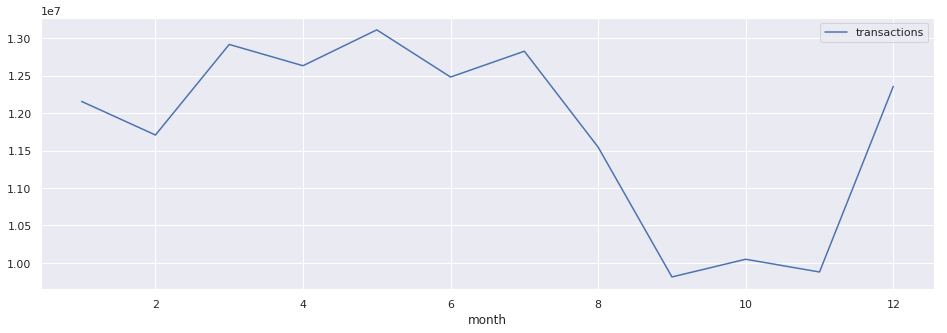

In [31]:
trans.groupby('month').sum().plot(figsize=(16, 5));

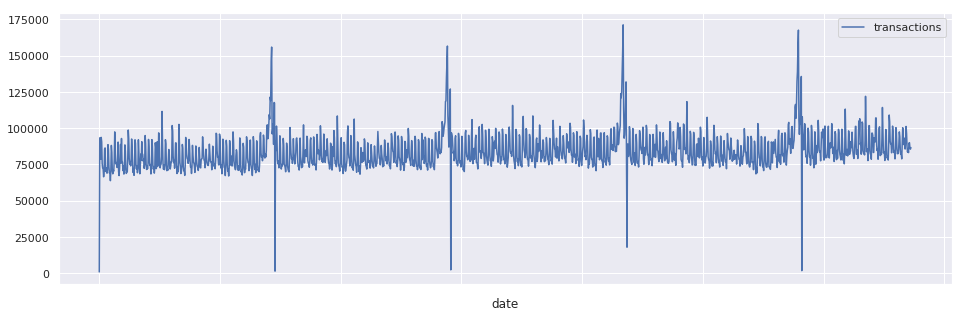

In [23]:
trans.groupby('date').sum().plot(figsize=(16, 5));

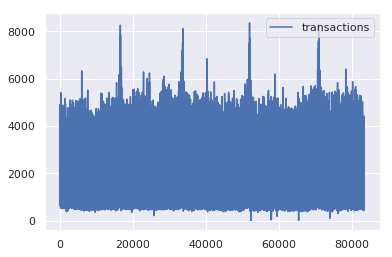

In [19]:
trans.plot()

In [108]:
items = pd.read_csv(
    "data/favorita/items.csv",
    dtype={
        'perishable': bool,
        'class': str,
    },
    index_col="item_nbr",
)
items.index = items.index.astype(str)
items.head()

,family,class,perishable
item_nbr,,,
96995,GROCERY I,1093,False
99197,GROCERY I,1067,False
103501,CLEANING,3008,False
103520,GROCERY I,1028,False
103665,BREAD/BAKERY,2712,True


In [113]:
items.dtypes

family        object
class         object
perishable      bool
dtype: object

In [111]:
data.head()

,date,store_nbr,item_nbr,unit_sales,onpromotion
id,,,,,
4954,2013-01-02,5,105737,6.0,NaN
4958,2013-01-02,5,108698,1.0,NaN
4961,2013-01-02,5,108797,13.0,NaN
4963,2013-01-02,5,111223,14.0,NaN
4964,2013-01-02,5,112830,1.0,NaN


In [112]:
data.join(items, on='item_nbr')

,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable
id,,,,,,,,
4954,2013-01-02,5,105737,6.000,NaN,GROCERY I,1044,False
4958,2013-01-02,5,108698,1.000,NaN,DELI,2644,True
4961,2013-01-02,5,108797,13.000,NaN,GROCERY I,1004,False
4963,2013-01-02,5,111223,14.000,NaN,GROCERY I,1034,False
4964,2013-01-02,5,112830,1.000,NaN,GROCERY I,1044,False
4965,2013-01-02,5,114790,47.000,NaN,GROCERY I,1004,False
4971,2013-01-02,5,115720,5.000,NaN,GROCERY I,1084,False
4972,2013-01-02,5,115847,2.000,NaN,LINGERIE,7034,False
4973,2013-01-02,5,115850,23.000,NaN,GROCERY I,1004,False


In [16]:
items.describe(include="all")

,family,class,perishable
count,4100,4100,4100
unique,33,337,2
top,GROCERY I,1016,False
freq,1334,133,3114


In [10]:
items['perishable'].unique()

array([False,  True])

In [15]:
items.dtypes

family        object
class         object
perishable      bool
dtype: object

In [5]:
s.replace?

## Exercise 2: EDA on grocery sales dataset (II)

In groups, ask your own questions about the data. Ideas:

* Are the products on promotion more successful?
* Negative transactions (returns): which stores? Which products or families? Which days?
* Adjust for holidays when displaying trend by day of week
* Perishable items in general and in the vicinity of the earthquake
* Do the type and cluster of the stores have an effect on the volume of transactions?
* Does any of the product families exhibit a distinct pattern?